In [280]:
from datetime import date
from nsepy import get_history
import numpy as np
import pandas as pd
import pickle
import yfinance as yf
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

In [314]:
yfin_data_file_name="yfin_1Y.pkl"
yfin_data_file_name_wo_ext="yfin_1Y"
dividends_file_name="dividends.pkl"
backtest_start=date(2022, 1, 5)
backtest_end=date(2022, 12, 30)

In [315]:
df = pd.read_csv('ind_nifty50list.csv')
nifty_companies_symbols=df['Symbol'].values.tolist()
nifty_companies_symbols=df['Symbol'].values.tolist()
for count in range(len(nifty_companies_symbols)):
    nifty_companies_symbols[count] = nifty_companies_symbols[count] + ".NS"

In [316]:
all_data=pd.read_pickle(yfin_data_file_name)
with open(dividends_file_name, 'rb') as f:
    divi = pickle.load(f)

In [317]:
temp=backtest_start
temp_list=[]
while temp<=backtest_end:
    if temp in all_data.Date.unique():
        temp_list.append(temp)
        temp =temp + relativedelta(months=+1)  
    else:
        temp=temp+relativedelta(days=+1)

In [318]:
all_data_monthly=all_data[all_data.Date.isin(temp_list)]

In [319]:
file_list=[]
date_list=[]
for i in range(0, len(all_data_monthly), 50):
    slc = all_data_monthly.iloc[i : i + 50]
    slc=slc.reset_index(drop=True)
    slc.to_pickle("./rankings"+"_"+yfin_data_file_name_wo_ext+"/"+str(slc.iloc[0]['Date'])+".pkl")
    file_list.append(str(slc.iloc[0]['Date'])+".pkl")
    date_list.append(slc.iloc[0]['Date'])

In [320]:
temp=backtest_start
all_trading_dates=[]
while temp<=date_list[-1]:
    if temp in all_data.Date.unique():
        all_trading_dates.append(temp)
    temp=temp+relativedelta(days=+1)

In [321]:
gk=all_data.groupby('Date')
# all_trading_dates=list(gk.first().apply(lambda x:x).reset_index()['Date'])

In [322]:
def entry():
    for i in range(10):
        data=[]
        data.append((portfolio_value*0.1)/unpickled_df.iloc[i]['Close'])
        data.append(unpickled_df.iloc[i]['Close'])
        data.append(unpickled_df.iloc[0]['Date'])
        portfolio[unpickled_df.iloc[i]['Symbol']]=data
    equity_curve.append(portfolio_value)
def recalibrate(relinquished_stocks_data,rank_range):
    date=unpickled_df.iloc[0]['Date']
    print("date"+str(date))
    top_30=set()
    for i in range(rank_range):
        top_30.add(unpickled_df.iloc[i]['Symbol'])
    removed_stocks=[]
    for i in portfolio.keys():
        if i not in top_30:
            removed_stocks.append(i)
    returns_from_shorted_stocks=[]
    for i in removed_stocks:
        value=0
        exit_price=float(unpickled_df[unpickled_df['Symbol']==i]['Close'])
        value+=portfolio[i][0]*exit_price
        returns_from_shorted_stocks.append(value)
        stock_data=portfolio.pop(i)
#         s1=pd.Series([unpickled_df.iloc[0]['Date'],stock_data[1],unpickled_df[unpickled_df['Symbol']==i]['Close'],stock_data[0]])
        d={'Share':i,'Entry Date':stock_data[2],'Entry Price':stock_data[1],'Exit Date':date,'Exit Price':exit_price,'Shares':stock_data[0]}
        d["P/L"]=d['Exit Price']-d['Entry Price']
        d['P/L%']=(d['Exit Price']-d['Entry Price'])/d['Entry Price']*100
#         df1 = pd.DataFrame(s1)
#         print(df1)
        relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
        print("removed:"+i)
#         print(value)
    returns_from_shorted_stocks.sort(reverse=True)
#     print(returns_from_shorted_stocks)
    for i in range(50):
        if unpickled_df.iloc[i]['Symbol'] not in portfolio.keys() and len(portfolio)<10:
            portfolio[unpickled_df.iloc[i]['Symbol']]=[(returns_from_shorted_stocks.pop(0)/unpickled_df.iloc[i]['Close']),unpickled_df.iloc[i]['Close'],unpickled_df.iloc[0]['Date']]
#             print("added"+unpickled_df.iloc[i]['Symbol'])
        if len(portfolio)>=10:
            break
    total_value=0
    for i in portfolio.keys():
        price=float(unpickled_df[unpickled_df['Symbol']==i]['Close'])
        if date in divi[i+".NS"].keys():
            portfolio[i][0]+=((divi[i+".NS"][date]*portfolio[i][0])/price)
        total_value+=portfolio[i][0]*price
    equity_curve.append(total_value)
    return relinquished_stocks_data
def exit(relinquished_stocks_data):
    value=0
    for i in portfolio.keys():
        stock_data=portfolio.get(i)
        exit_price=float(unpickled_df[unpickled_df['Symbol']==i]['Close'])
        d={'Share':i,'Entry Date':stock_data[2],'Entry Price':stock_data[1],'Exit Date':unpickled_df.iloc[0]['Date'],'Exit Price':exit_price,'Shares':stock_data[0]}
        d["P/L"]=d['Exit Price']-d['Entry Price']
        d['P/L%']=(d['Exit Price']-d['Entry Price'])/d['Entry Price']*100
        value+=exit_price*stock_data[0]
        relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
    portfolio.clear()
    print(f"v:{value}")
    equity_curve.append(value)
    return relinquished_stocks_data

In [323]:
def find_portfolio_value(date):
    value=0
    for i in portfolio.keys():
        price=float(curr_date[(curr_date['Date'] == date) & (curr_date["Symbol"] == i)]['Close'])
        if date in divi[i+".NS"].keys():
            t=divi[i+".NS"][date]
            v=t*float(curr_date[(curr_date['Date'] == date) & (curr_date["Symbol"] == i)]['Close'])
            portfolio[i][0]+=((divi[i+".NS"][date]*portfolio[i][0])/price)
            print(divi[i+".NS"][date]*portfolio[i][0])
        value+=price*portfolio[i][0]
    equity_curve.append(value)
#     if value!=0:
#         equity_curve.append(value)

In [324]:
start = date(2021, 1, 1)
end = date(2022, 12, 31)
nifty=yf.download("^NSEI",start,end,actions=True)

[*********************100%***********************]  1 of 1 completed


In [325]:
nifty.reset_index(names='Date',inplace=True)
nifty['Date']=nifty['Date'].apply(lambda x: x.date())

In [329]:
portfolio={}
equity_curve=[]
portfolio_value=17925
#nifty value on 5/1/22:17925
relinquished_stocks_data= pd.DataFrame()
nifty_curve=[]
count=0
for j in all_trading_dates:
    count+=1
    nifty_curve.append(float(nifty[nifty['Date']==j]['Close']))
    if j in date_list:
        file_name=str(j)+".pkl"
        unpickled_df = pd.read_pickle("./rankings_"+yfin_data_file_name_wo_ext+"/"+file_name)
        if file_name==file_list[0]:
            entry()
        elif file_name==file_list[len(file_list)-1]:
            relinquished_stocks_data=exit(relinquished_stocks_data)
            break
        else:
            relinquished_stocks_data=recalibrate(relinquished_stocks_data,30)
#             curr_date=gk.get_group(j)
#             find_portfolio_value(j)
    else:
        curr_date=gk.get_group(j)
        find_portfolio_value(j)
# #     else:
#         find_portfolio_value(all_data.loc[j,'Date'])

2.516415648405097
date2022-02-07
date2022-03-07
12.687077638915522
date2022-04-07
date2022-05-09
removed:WIPRO
removed:JSWSTEEL
date2022-06-09
removed:GRASIM
removed:TATASTEEL
0.39873605694982267
4.226273943936121
date2022-07-11
removed:HINDALCO
removed:TECHM
1.0453538270151355
14.994038615234444
33.67057531075269


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

date2022-08-11
4.246695351550731
31.971235602665082
date2022-09-12
removed:APOLLOHOSP
date2022-10-12
removed:ONGC
date2022-11-14
removed:TATAMOTORS
removed:BAJAJFINSV
87.0256023938163


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

v:18357.41202979823


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from

In [331]:
cagr=[]
count=0
for i in range(10,31):
    portfolio={}
    equity_curve=[]
    portfolio_value=100000
    relinquished_stocks_data= pd.DataFrame()
    nifty_curve=[]
    for j in all_trading_dates:
        count+=1
        nifty_curve.append(float(nifty[nifty['Date']==j]['Close']))
        if j in date_list:
            file_name=str(j)+".pkl"
            unpickled_df = pd.read_pickle("./rankings_"+yfin_data_file_name_wo_ext+"/"+file_name)
            if file_name==file_list[0]:
                entry()
            elif file_name==file_list[len(file_list)-1]:
                relinquished_stocks_data=exit(relinquished_stocks_data)
                break
            else:
                relinquished_stocks_data=recalibrate(relinquished_stocks_data,i)
    #             curr_date=gk.get_group(j)
    #             find_portfolio_value(j)
        else:
            curr_date=gk.get_group(j)
            find_portfolio_value(j)
    cagr.append((pow(equity_curve[-1]/equity_curve[0],n)-1)*100)
# #     else:
#         find_portfolio_value(all_data.loc[j,'Date'])

14.038581023180457
date2022-02-07
removed:GRASIM
removed:WIPRO
removed:TECHM
100.73279264874012


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

date2022-03-07
removed:TATAMOTORS
removed:SBIN
date2022-04-07
removed:JSWSTEEL
date2022-05-09
removed:APOLLOHOSP
removed:BAJAJFINSV
removed:HINDALCO
removed:TATASTEEL
removed:SUNPHARMA
114.75215279654975
date2022-06-09
removed:TECHM
removed:TATAMOTORS
removed:SBIN


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

24.42773207337588
date2022-07-11
removed:ONGC
removed:RELIANCE
5.8318205133340895
110.63243431059016
32.43076523670039
204.5045802345022
date2022-08-11
removed:SUNPHARMA
removed:BHARTIARTL
21.361301537813926
102.95891409430817
date2022-09-12
removed:RELIANCE


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

date2022-10-12
removed:TITAN
removed:POWERGRID
removed:TATAMOTORS
date2022-11-14
removed:SBIN
removed:ICICIBANK
677.6587616480409
v:107658.86966045974
14.038581023180457


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from

date2022-02-07
removed:GRASIM
removed:WIPRO
100.73279264874012
date2022-03-07
removed:TATAMOTORS
removed:SBIN
date2022-04-07
removed:JSWSTEEL


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

date2022-05-09
removed:APOLLOHOSP
removed:BAJAJFINSV
removed:HINDALCO
removed:TATASTEEL
removed:SUNPHARMA
114.75215279654975
date2022-06-09
removed:TECHM
removed:TATAMOTORS
removed:SBIN
25.337046477182227
date2022-07-11
removed:ONGC
removed:RELIANCE
5.8318205133340895
110.63243431059016
30.508123899750696
204.5045802345022
date2022-08-11
removed:SUNPHARMA
removed:BHARTIARTL
21.762515300417125
102.95891409430817
date2022-09-12
removed:RELIANCE
date2022-10-12
removed:TITAN
removed:POWERGRID
removed:TATAMOTORS
date2022-11-14
removed:SBIN
removed:ICICIBANK
677.6587616480409


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

v:107662.5116874266
14.038581023180457
date2022-02-07
removed:WIPRO
80.36410214561093
date2022-03-07
removed:TATAMOTORS
removed:GRASIM
date2022-04-07
removed:JSWSTEEL
date2022-05-09
removed:APOLLOHOSP
removed:BAJAJFINSV
removed:HINDALCO
removed:TATASTEEL
114.75215279654975
date2022-06-09
removed:TECHM
removed:SBIN
26.07728230349747
date2022-07-11
removed:ONGC
5.8318205133340895
84.24902367865771
26.287872293673686
204.5045802345022
date2022-08-11
removed:SUNPHARMA
removed:BHARTIARTL
19.26103045321133
102.95891409430817


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

date2022-09-12
removed:RELIANCE
date2022-10-12
removed:TITAN
removed:TATAMOTORS
date2022-11-14
removed:SBIN
677.6587616480409
v:107863.45667186625
14.038581023180457


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

date2022-02-07
removed:WIPRO
80.36410214561093
date2022-03-07
removed:TATAMOTORS
removed:GRASIM
date2022-04-07
removed:JSWSTEEL
date2022-05-09
removed:APOLLOHOSP
removed:BAJAJFINSV
removed:HINDALCO
removed:TATASTEEL
114.75215279654975
date2022-06-09
removed:TECHM
removed:SBIN
26.07728230349747


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

date2022-07-11
removed:ONGC
5.8318205133340895
84.24902367865771
26.287872293673686
204.5045802345022
date2022-08-11
removed:SUNPHARMA
removed:BHARTIARTL
19.26103045321133
102.95891409430817
date2022-09-12
removed:RELIANCE
date2022-10-12
removed:TITAN
removed:TATAMOTORS
date2022-11-14
removed:SBIN
677.6587616480409


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

v:107863.45667186625
14.038581023180457
date2022-02-07
removed:WIPRO
80.36410214561093
date2022-03-07
removed:TATAMOTORS
removed:GRASIM
date2022-04-07
removed:JSWSTEEL
date2022-05-09
removed:APOLLOHOSP
removed:HINDALCO
removed:TATASTEEL
date2022-06-09
removed:BAJAJFINSV
removed:TECHM
26.07728230349747
date2022-07-11
removed:ONGC
5.8318205133340895
77.39283136189216
26.287872293673686


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

204.5045802345022
date2022-08-11
removed:SUNPHARMA
removed:BHARTIARTL
19.26103045321133
102.95891409430817
date2022-09-12
removed:RELIANCE
date2022-10-12
removed:TATAMOTORS
date2022-11-14
removed:TITAN
669.7511069398456


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

v:107338.8955517904
14.038581023180457
date2022-02-07
removed:WIPRO
80.36410214561093
date2022-03-07
removed:TATAMOTORS
removed:GRASIM
date2022-04-07
removed:JSWSTEEL
date2022-05-09
removed:APOLLOHOSP
removed:HINDALCO
removed:TATASTEEL
date2022-06-09
removed:BAJAJFINSV
removed:TECHM
26.07728230349747
date2022-07-11
removed:ONGC
5.8318205133340895
77.39283136189216
26.287872293673686
204.5045802345022
date2022-08-11
removed:SUNPHARMA
removed:BHARTIARTL
19.26103045321133
102.95891409430817
date2022-09-12


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

removed:RELIANCE
date2022-10-12
removed:TATAMOTORS
date2022-11-14
removed:TITAN
669.7511069398456
v:107338.8955517904
14.038581023180457


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from

date2022-02-07
removed:WIPRO
80.36410214561093
date2022-03-07
removed:TATAMOTORS
removed:GRASIM
date2022-04-07
removed:JSWSTEEL
date2022-05-09
removed:APOLLOHOSP
removed:TATASTEEL


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

date2022-06-09
removed:BAJAJFINSV
removed:HINDALCO
removed:TECHM
26.07728230349747
date2022-07-11
removed:ONGC
5.8318205133340895
93.87867711566862
26.287872293673686
204.5045802345022
date2022-08-11
removed:BHARTIARTL
29.435471504576334
102.95891409430817
date2022-09-12
date2022-10-12
removed:TATAMOTORS


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

date2022-11-14
removed:TITAN
564.6825799261078
v:105735.49897984474
14.038581023180457
date2022-02-07
removed:WIPRO
80.36410214561093
date2022-03-07
removed:TATAMOTORS
removed:GRASIM


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from

date2022-04-07
removed:JSWSTEEL
date2022-05-09
removed:APOLLOHOSP
removed:TATASTEEL
date2022-06-09
removed:BAJAJFINSV
removed:HINDALCO
removed:TECHM
26.07728230349747
date2022-07-11
removed:ONGC
5.8318205133340895
93.87867711566862
26.287872293673686
204.5045802345022


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

date2022-08-11
removed:BHARTIARTL
29.435471504576334
102.95891409430817
date2022-09-12
date2022-10-12
removed:TATAMOTORS
date2022-11-14
removed:TITAN
564.6825799261078


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from

v:105735.49897984474
14.038581023180457
date2022-02-07
removed:WIPRO
80.36410214561093
date2022-03-07
removed:TATAMOTORS
removed:GRASIM
date2022-04-07
date2022-05-09
removed:APOLLOHOSP
removed:TATASTEEL
removed:JSWSTEEL
date2022-06-09
removed:BAJAJFINSV
removed:HINDALCO
26.07728230349747
date2022-07-11
removed:TECHM
removed:ONGC
5.8318205133340895
93.87867711566862
26.287872293673686
204.5045802345022
date2022-08-11
removed:BHARTIARTL
29.435471504576334
90.53034944295447
date2022-09-12


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

date2022-10-12
date2022-11-14
removed:TITAN
removed:TATAMOTORS
564.6825799261078
v:103047.20703482165
14.038581023180457
date2022-02-07
removed:WIPRO
80.36410214561093


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from

date2022-03-07
removed:TATAMOTORS
removed:GRASIM
date2022-04-07
date2022-05-09
removed:APOLLOHOSP
removed:TATASTEEL
removed:JSWSTEEL
date2022-06-09
removed:BAJAJFINSV
removed:HINDALCO
26.07728230349747


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

date2022-07-11
removed:TECHM
5.8318205133340895
93.87867711566862
204.5045802345022
date2022-08-11
152.8260376614819
29.435471504576334
90.53034944295447
date2022-09-12
date2022-10-12
removed:ONGC


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)


date2022-11-14
removed:TITAN
removed:TATAMOTORS
564.6825799261078
v:103505.40369757029
14.038581023180457
date2022-02-07
removed:WIPRO
80.36410214561093
date2022-03-07
removed:TATAMOTORS
removed:GRASIM


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from

date2022-04-07
date2022-05-09
removed:APOLLOHOSP
removed:TATASTEEL
removed:JSWSTEEL
date2022-06-09
removed:BAJAJFINSV
removed:HINDALCO
26.07728230349747
date2022-07-11
removed:TECHM
5.8318205133340895
93.87867711566862
204.5045802345022


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

date2022-08-11
152.8260376614819
29.435471504576334
90.53034944295447
date2022-09-12
date2022-10-12
removed:ONGC
date2022-11-14
removed:TATAMOTORS
564.6825799261078


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from

v:103534.17738804113
14.038581023180457
date2022-02-07
date2022-03-07
removed:TATAMOTORS
removed:GRASIM
70.77867580984949
date2022-04-07


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

date2022-05-09
removed:APOLLOHOSP
removed:WIPRO
removed:TATASTEEL
removed:JSWSTEEL
date2022-06-09
removed:BAJAJFINSV
removed:HINDALCO
25.337046477182227
date2022-07-11
removed:TECHM
5.8318205133340895
93.87867711566862
204.5045802345022


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)


date2022-08-11
147.39269513526
90.53034944295447
20.360391282742135
date2022-09-12
date2022-10-12
removed:ONGC
date2022-11-14
removed:TATAMOTORS
604.8496750014539


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from

v:102692.86096639915
14.038581023180457
date2022-02-07
date2022-03-07
removed:TATAMOTORS
removed:GRASIM
70.77867580984949
date2022-04-07
date2022-05-09
removed:APOLLOHOSP
removed:WIPRO
removed:TATASTEEL
removed:JSWSTEEL
date2022-06-09
removed:HINDALCO
2.224468936958565
25.337046477182227
date2022-07-11
removed:BAJAJFINSV
removed:TECHM
5.8318205133340895
93.87867711566862


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

204.5045802345022
date2022-08-11
147.39269513526
90.53034944295447
20.360391282742135
date2022-09-12
date2022-10-12
removed:ONGC
date2022-11-14
removed:TATAMOTORS
604.8496750014539


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from

v:101625.11269460351
14.038581023180457
date2022-02-07
date2022-03-07
removed:TATAMOTORS
removed:GRASIM
70.77867580984949
date2022-04-07


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

date2022-05-09
removed:APOLLOHOSP
removed:WIPRO
removed:JSWSTEEL
date2022-06-09
removed:HINDALCO
removed:TATASTEEL
2.224468936958565
25.337046477182227
date2022-07-11
removed:BAJAJFINSV
removed:TECHM
5.8318205133340895
99.04855344435765
187.84142432776954


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

date2022-08-11
147.39269513526
70.19287466735085
20.360391282742135
date2022-09-12
date2022-10-12
removed:ONGC
date2022-11-14
removed:TATAMOTORS
684.9685256485975


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from

v:99704.64330305917
14.038581023180457
date2022-02-07
date2022-03-07
removed:GRASIM
70.77867580984949
date2022-04-07


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

date2022-05-09
removed:APOLLOHOSP
removed:WIPRO
removed:JSWSTEEL
date2022-06-09
removed:HINDALCO
removed:TATASTEEL
2.224468936958565
26.107450807946055
date2022-07-11
removed:BAJAJFINSV
removed:TECHM
5.8318205133340895
99.04855344435765
187.84142432776954


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

date2022-08-11
147.39269513526
63.390917894784735
20.360391282742135
date2022-09-12
date2022-10-12
removed:ONGC
date2022-11-14
removed:TATAMOTORS
684.9685256485975


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from

v:100741.64637340145
14.038581023180457
date2022-02-07
date2022-03-07
removed:GRASIM
70.77867580984949
date2022-04-07


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)


date2022-05-09
removed:WIPRO
removed:JSWSTEEL
date2022-06-09
removed:TATASTEEL
2.224468936958565
23.577539436184775
date2022-07-11
removed:BAJAJFINSV
removed:HINDALCO
removed:TECHM
5.8318205133340895
99.04855344435765
187.84142432776954


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

date2022-08-11
23.691466396377855
147.39269513526
20.360391282742135
date2022-09-12
removed:APOLLOHOSP
date2022-10-12
removed:ONGC
date2022-11-14
removed:TATAMOTORS
555.855566263014


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from

v:101294.67782212603
14.038581023180457
date2022-02-07
date2022-03-07
70.77867580984949
date2022-04-07
removed:GRASIM
date2022-05-09
removed:WIPRO
removed:JSWSTEEL
date2022-06-09
removed:TATASTEEL
2.224468936958565
23.577539436184775
date2022-07-11
removed:BAJAJFINSV
removed:HINDALCO
removed:TECHM
5.8318205133340895
99.04855344435765


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

187.84142432776954
date2022-08-11
23.691466396377855
189.74919679801152
20.360391282742135
date2022-09-12
removed:APOLLOHOSP
date2022-10-12
removed:ONGC
date2022-11-14
removed:TATAMOTORS
555.855566263014


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from

v:103111.80435397253
14.038581023180457
date2022-02-07
date2022-03-07
70.77867580984949
date2022-04-07


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

removed:GRASIM
date2022-05-09
removed:WIPRO
removed:JSWSTEEL
date2022-06-09
removed:TATASTEEL
2.224468936958565
23.577539436184775
date2022-07-11
removed:BAJAJFINSV
removed:HINDALCO
removed:TECHM
5.8318205133340895
99.04855344435765
187.84142432776954
date2022-08-11
23.691466396377855
189.74919679801152
20.360391282742135
date2022-09-12
removed:APOLLOHOSP
date2022-10-12
removed:ONGC
date2022-11-14
removed:TATAMOTORS
555.855566263014


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from

v:103111.80435397253
14.038581023180457
date2022-02-07
date2022-03-07
70.77867580984949
date2022-04-07
removed:GRASIM
date2022-05-09
removed:WIPRO
removed:JSWSTEEL
date2022-06-09
removed:TATASTEEL
2.224468936958565
23.577539436184775
date2022-07-11
removed:BAJAJFINSV
removed:HINDALCO
removed:TECHM
5.8318205133340895
99.04855344435765
187.84142432776954
date2022-08-11
23.691466396377855
189.74919679801152
20.360391282742135


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

date2022-09-12
removed:APOLLOHOSP
date2022-10-12
removed:ONGC
date2022-11-14
removed:TATAMOTORS
555.855566263014


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from

v:103111.80435397253
14.038581023180457
date2022-02-07
date2022-03-07
70.77867580984949
date2022-04-07
removed:GRASIM
date2022-05-09
removed:WIPRO
removed:JSWSTEEL
date2022-06-09
removed:TATASTEEL
2.224468936958565
23.577539436184775
date2022-07-11
removed:HINDALCO
removed:TECHM
5.8318205133340895
99.04855344435765
187.84142432776954
date2022-08-11
23.691466396377855
189.74919679801152
date2022-09-12
removed:APOLLOHOSP


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

date2022-10-12
removed:ONGC
date2022-11-14
removed:TATAMOTORS
removed:BAJAJFINSV
485.4984791844703
v:104616.141175004
14.038581023180457


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:60: FutureWarning: The frame.append method is deprecated and will be removed from

date2022-02-07
date2022-03-07
70.77867580984949
date2022-04-07
date2022-05-09
removed:WIPRO
removed:JSWSTEEL


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

date2022-06-09
removed:GRASIM
removed:TATASTEEL
2.224468936958565
23.577539436184775
date2022-07-11
removed:HINDALCO
removed:TECHM
5.8318205133340895
83.64875099154501
187.84142432776954
date2022-08-11
23.691466396377855
178.3611470162627
date2022-09-12
removed:APOLLOHOSP
date2022-10-12
removed:ONGC
date2022-11-14
removed:TATAMOTORS
removed:BAJAJFINSV
485.4984791844703
v:102412.34047307243


C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relinquished_stocks_data=relinquished_stocks_data.append(d,ignore_index=True)
C:\Users\Pratyush\AppData\Local\Temp\ipykernel_17132\3257593740.py:32: FutureWarning: The frame.append method is deprecated and will be removed from

In [305]:
equity_curve

[100000,
 99575.91036152176,
 99821.60397656231,
 100566.08329784563,
 100925.61862377904,
 101556.187627352,
 101439.16387336723,
 101210.3784477779,
 101143.0321294815,
 98654.60993262904,
 98324.29395595627,
 97768.72501606045,
 95857.01346740525,
 91948.05393882906,
 92344.55763933853,
 90691.21768083512,
 91059.77099239726,
 92932.51639090035,
 94422.04857000207,
 95718.25625737979,
 94737.09534163568,
 94897.78361492767,
 92978.04512209754,
 92896.55485206966,
 94407.76348903656,
 95283.59819746843,
 93732.53833947558,
 91092.96132607952,
 94217.76900843572,
 94049.89805341577,
 94179.50700757914,
 93522.8945378882,
 92531.77514635379,
 92340.55107111411,
 92371.07892493602,
 88176.56352442873,
 91257.99956819072,
 93078.77554711218,
 93407.70498913407,
 93684.62671686594,
 91182.95099318653,
 91426.2234882924,
 91092.94863292716,
 92296.51934720075,
 93392.6134752216,
 93631.66496889712,
 94071.01522710989,
 92518.29752704472,
 94342.29758884825,
 95444.38201877191,
 94797.00221

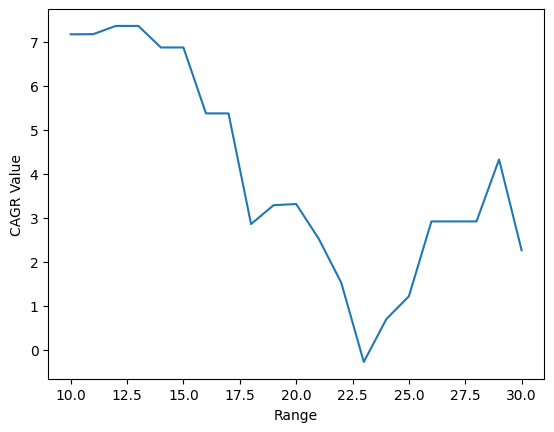

In [334]:
x=np.array(range(10,31))
# x=np.array(all_trading_dates)
plt.plot(x,cagr)
# plt.plot(x,equity_curve)
# plt.plot(x,nifty_curve)
plt.xlabel("Range")
plt.ylabel("CAGR Value")
# plt.legend(["Portfolio Value","NIFTY 50"], loc=0)
plt.show()

In [328]:
n=(count*1.4+15)/365
cagr=(pow(equity_curve[-1]/equity_curve[0],n)-1)*100
print("cagr: "+str(cagr))
net_gain=equity_curve[-1]-portfolio_value
print("net_gain: "+str(net_gain))

cagr: 2.2626335100575767
net_gain: 2412.3404730724287
